<a href="https://colab.research.google.com/github/chaimasaoudi/chaimasaoudi/blob/main/churn_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_excel("churn.xlsx",'Data Dict',index_col=0)
df

,Unnamed: 1,Unnamed: 2,Unnamed: 3
NaN,Data,Variable,Discerption
NaN,E Comm,CustomerID,Unique customer ID
NaN,E Comm,Churn,Churn Flag
NaN,E Comm,Tenure,Tenure of customer in organization
NaN,E Comm,PreferredLoginDevice,Preferred login device of customer
NaN,E Comm,CityTier,City tier
NaN,E Comm,WarehouseToHome,Distance in between warehouse to home of customer
NaN,E Comm,PreferredPaymentMode,Preferred payment method of customer
NaN,E Comm,Gender,Gender of customer
NaN,E Comm,HourSpendOnApp,Number of hours spend on mobile application or...


shape of data frame

In [ ]:

df=pd.read_excel("churn.xlsx",'E Comm')
df.shape

(5630, 20)

Descriptions statistiques du datase



In [ ]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


Columns types

In [ ]:
df.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

Duplicate

In [ ]:
df.duplicated().sum()

0

Missing values


In [ ]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

Deal with missing values pandas **(KnnInputer)**

In [ ]:

from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=2)
a=np.array(df)
a


array([[50001, 1, 4.0, ..., 1.0, 5.0, 159.93],
       [50002, 1, nan, ..., 1.0, 0.0, 120.9],
       [50003, 1, nan, ..., 1.0, 3.0, 120.28],
       ...,
       [55628, 0, 1.0, ..., 2.0, 4.0, 186.42],
       [55629, 0, 23.0, ..., 2.0, 9.0, 178.9],
       [55630, 0, 8.0, ..., 2.0, 3.0, 169.04]], dtype=object)

In [ ]:
a[:,-5:-1]=imputer.fit_transform(a[:,-5:-1])
a[:,[2,5,8]]=imputer.fit_transform(a[:,[2,5,8]])
df2=pd.DataFrame(a,columns=df.columns)
df2.isnull().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

BoxPlot (outliers detection)

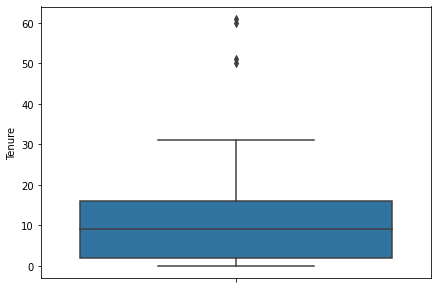

In [ ]:
plt.figure(figsize=(7,5))
figure = sns.boxplot(y=df2['Tenure'])



In [ ]:
def IQR_Q3_Q1 (data_frame,champ):
  Q1=data_frame[champ].quantile(0.25)
  Q3=data_frame[champ].quantile(0.75)
  iqr=Q3-Q1
  return([iqr,Q3,Q1])
def Acceptebale_range(data_frame,champ):
    l_iqr=IQR_Q3_Q1(data_frame,champ)
    #Q3=l_iqr[1]
    #Q1=l_iqr[2]
    #IQR=l_iqr[0]
    lower_limit = l_iqr[2] - 1.5*l_iqr[0]
    upper_limit = l_iqr[1] + 1.5*l_iqr[0]
    return [lower_limit,upper_limit]


In [ ]:
limit=Acceptebale_range(df2,'Tenure')
print(limit[0],"=<Acceptebale range<=",limit[1])

-19.0 =<Acceptebale range<= 37.0


outliers



In [ ]:
df2[(df2['Tenure']>limit[1])|(df2['Tenure']<limit[0])]


,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
928,50929,0,50.0,Phone,1,6.0,Debit Card,Male,3.0,1,Laptop & Accessory,3,Divorced,1,0,24.0,1.0,2.0,8.0,149.0
2719,52720,0,60.0,Mobile Phone,3,27.0,Debit Card,Female,3.0,3,Grocery,1,Married,5,1,13.0,0.0,1.0,0.0,278.75
3743,53744,0,51.0,Mobile Phone,1,7.0,Debit Card,Male,4.0,2,Laptop & Accessory,3,Divorced,2,0,25.0,2.0,3.0,9.0,174.0
5534,55535,0,61.0,Mobile Phone,3,28.0,Debit Card,Female,4.0,4,Grocery,1,Married,6,1,13.0,1.0,2.0,1.0,303.75


Drop outliers(**Tenure)**

In [ ]:
df2=df2[(df2['Tenure']<=limit[1])&(df2['Tenure']>=limit[0])]
df2.shape


(5626, 20)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
Gender,,,,,,,,,,,,,,,,,,,
Female,1896,1896,1896,1896,1896,1896,1896,1896,1896,1896,1896,1896,1896,1896,1896,1896,1896,1896,1896
Male,2782,2782,2782,2782,2782,2782,2782,2782,2782,2782,2782,2782,2782,2782,2782,2782,2782,2782,2782


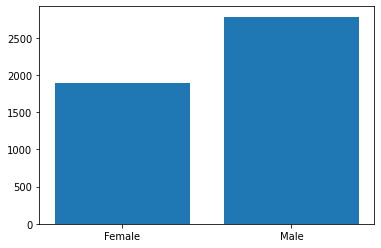

In [ ]:

d=df2[(df2['Churn']==0)].groupby(['Gender']).count()
plt.bar(d.index, d.Churn)
d


,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
Gender,,,,,,,,,,,,,,,,,,,
Female,348,348,348,348,348,348,348,348,348,348,348,348,348,348,348,348,348,348,348
Male,600,600,600,600,600,600,600,600,600,600,600,600,600,600,600,600,600,600,600


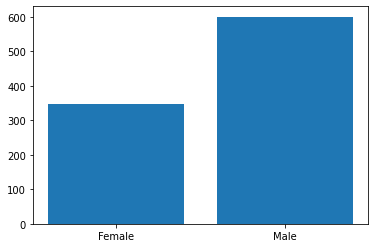

In [ ]:
d2=df2[(df2['Churn']==1)].groupby(['Gender']).count()
plt.bar(d2.index, d2.Churn)
d2

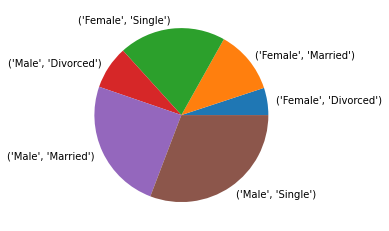

Gender  MaritalStatus
Female  Divorced          48
        Married          112
        Single           188
Male    Divorced          76
        Married          232
        Single           292
Name: Churn, dtype: int64

In [ ]:
d3=df2[(df2['Churn']==1)].groupby(['Gender','MaritalStatus']).count()
plt.pie(d3.Churn, labels = d3.index)
plt.show()
d3['Churn']

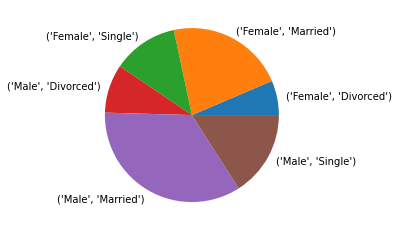

Gender  MaritalStatus
Female  Divorced          300
        Married          1026
        Single            570
Male    Divorced          422
        Married          1614
        Single            746
Name: Churn, dtype: int64

In [ ]:
d4=df2[(df2['Churn']==0)].groupby(['Gender','MaritalStatus']).count()
plt.pie(d4.Churn, labels = d4.index)
plt.show()
d4['Churn']

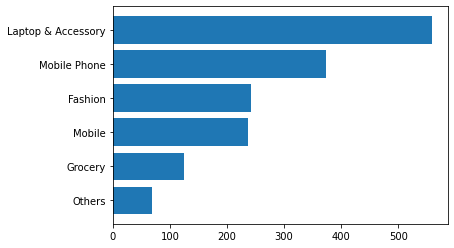

In [ ]:
d5=df2[(df2['Complain']==1)].groupby(['PreferedOrderCat']).count()
d5=d5.sort_values('Complain')
plt.barh(d5.index, d5.Complain)
plt.show()

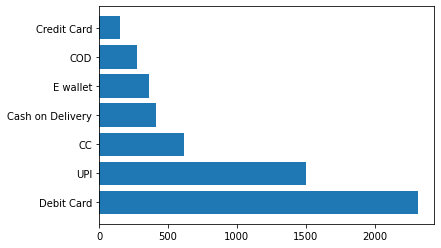

In [ ]:
labels = df['PreferredPaymentMode'].unique()
values = df['PreferredPaymentMode'].value_counts()
plt.barh(labels, values)
plt.show()

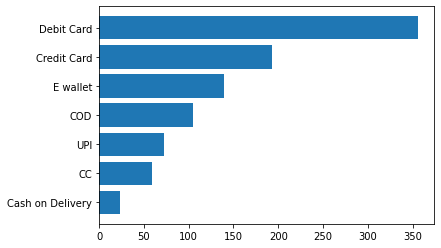

In [ ]:
d6=df2[(df2['Churn']==1)].groupby(['PreferredPaymentMode']).count()
d6=d6.sort_values('Complain')
plt.barh(d6.index, d6.Complain)
plt.show()

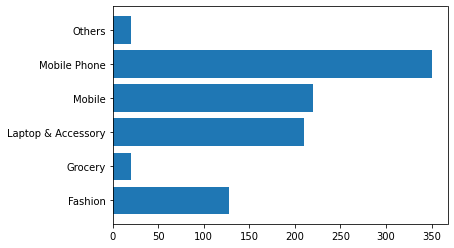

In [ ]:
d7=df2[(df2['Churn']==1)].groupby(['PreferedOrderCat']).count()
plt.barh(d7.index, d7.Complain)
plt.show()


In [ ]:
d8=df2.groupby(['Churn','Complain','Gender']).count()
d8['CustomerID']

Churn  Complain  Gender
0      0         Female    1396
                 Male      2188
       1         Female     500
                 Male       594
1      0         Female     160
                 Male       280
       1         Female     188
                 Male       320
Name: CustomerID, dtype: int64

Encoding

In [ ]:
l=list(df2.columns)
df2['PreferredLoginDevice'].unique()
x=pd.get_dummies(df2,columns=['PreferredLoginDevice','Gender','PreferredPaymentMode','PreferedOrderCat','MaritalStatus' ])
l=list(x.columns)
x[l]=x[l].apply(pd.to_numeric)
x.dtypes




CustomerID                                 int64
Churn                                      int64
Tenure                                   float64
CityTier                                   int64
WarehouseToHome                          float64
HourSpendOnApp                           float64
NumberOfDeviceRegistered                   int64
SatisfactionScore                          int64
NumberOfAddress                            int64
Complain                                   int64
OrderAmountHikeFromlastYear              float64
CouponUsed                               float64
OrderCount                               float64
DaySinceLastOrder                        float64
CashbackAmount                           float64
PreferredLoginDevice_Computer              uint8
PreferredLoginDevice_Mobile Phone          uint8
PreferredLoginDevice_Phone                 uint8
Gender_Female                              uint8
Gender_Male                                uint8
PreferredPaymentMode

**Split Train Test**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
y=df2['Churn']
y=y.apply(pd.to_numeric)
x=x.drop(['Churn'],axis=1)
x[["CustomerID", "Tenure", "CityTier", "WarehouseToHome", "HourSpendOnApp", "NumberOfDeviceRegistered", "SatisfactionScore", "NumberOfAddress", "Complain", "OrderAmountHikeFromlastYear", "CouponUsed", "OrderCount", "DaySinceLastOrder", "CashbackAmount"]] = x[["CustomerID", "Tenure", "CityTier", "WarehouseToHome", "HourSpendOnApp", "NumberOfDeviceRegistered", "SatisfactionScore", "NumberOfAddress", "Complain", "OrderAmountHikeFromlastYear", "CouponUsed", "OrderCount", "DaySinceLastOrder", "CashbackAmount"]].apply(pd.to_numeric)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(x_train,y_train)
predictions = xgb_classifier.predict(x_test)
print("Accuracy of Model::",accuracy_score(y_test,predictions))
print('score',xgb_classifier.score(x_test,y_test))


Accuracy of Model:: 0.88898756660746
score 0.88898756660746
